In [21]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random
import matplotlib.pyplot as plt

In [50]:
data_original = pd.read_csv("add.csv")
data_original.head()

C:\Users\kanakaraju\AppData\Local\Temp\ipykernel_11084\1021941276.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_original = pd.read_csv("add.csv")


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,0,125,125,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,1,57,468,8.2105,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,2,33,230,6.9696,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,3,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,4,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [53]:
# Select columns
data_select = data_original[['0', '1', '2', '1558']]
data_select.head()

,0,1,2,1558
0,125,125,1,ad.
1,57,468,8.2105,ad.
2,33,230,6.9696,ad.
3,60,468,7.8,ad.
4,60,468,7.8,ad.


In [56]:
# Remove NAs from any column
data_select = data_select[data_select['0'].notna()]
data_select = data_select[data_select['1'].notna()]
data_select = data_select[data_select['2'].notna()]
data_select = data_select[data_select['1558'].notna()]

In [54]:
# Determine data type for each column
data_select['0'] = pd.to_numeric(data_select['0'], errors = 'coerce')
data_select['1'] = pd.to_numeric(data_select['1'], errors = 'coerce')
data_select['2'] = pd.to_numeric(data_select['2'], errors = 'coerce')
data_select[['1558']] = data_select[['1558']].astype('string')
data_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2376 non-null   float64
 1   1       2378 non-null   float64
 2   2       2369 non-null   float64
 3   1558    3279 non-null   string 
dtypes: float64(3), string(1)
memory usage: 102.6 KB


C:\Users\kanakaraju\AppData\Local\Temp\ipykernel_11084\2082297863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_select['0'] = pd.to_numeric(data_select['0'], errors = 'coerce')
C:\Users\kanakaraju\AppData\Local\Temp\ipykernel_11084\2082297863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_select['1'] = pd.to_numeric(data_select['1'], errors = 'coerce')
C:\Users\kanakaraju\AppData\Local\Temp\ipykernel_11084\2082297863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [25]:
# Identify frequency of ads and non-ads
data_select.groupby('1558').count()

,0,1,2
1558,,,
ad.,386,386,386
nonad.,1990,1992,1983


In [57]:
# Convert last column to 1 or 0. 1 is ad, 0 is non-ad
data_select['1558'] = np.where(data_select['1558'] == 'ad.', 1, 0)
data_select['1558'] = data_select['1558'].astype(float)

In [60]:
# Remove NaN
data_select = data_select.dropna()
data_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 3278
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   height        2369 non-null   float64
 1   width         2369 non-null   float64
 2   aspect_ratio  2369 non-null   float64
 3   category      2369 non-null   float64
dtypes: float64(4)
memory usage: 92.5 KB


In [63]:
# Rename columns
data_select.columns = ['height', 'width', 'aspect_ratio', 'category']
data_select.head()
data_select.tail()
data_select.head()

,height,width,aspect_ratio,category
0,125.0,125.0,1.0000,1.0
1,57.0,468.0,8.2105,1.0
2,33.0,230.0,6.9696,1.0
3,60.0,468.0,7.8000,1.0
4,60.0,468.0,7.8000,1.0


In [64]:
# Split data into train and development sets
random.seed(1)
data_select = shuffle(data_select)

train_set, test_set = train_test_split(data_select, train_size=80, test_size=20)

X_train = train_set[['height', 'width', 'aspect_ratio']]
Y_train = train_set[['category']]

X_test = test_set[['height', 'width', 'aspect_ratio']]
Y_test = test_set[['category']]

X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

# Convert to numpy array
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [65]:
# logistic regression with neural network framework
# List of helper functions
# sigmoid()
# initialise_with_zeros()
# propagate()
# optimise()
# predict()
# model()

In [66]:
# sigmoid()
def sigmoid(z):
    # Compute the sigmoid of z
    # Arguments:
    # z - A scalar or numpy array of any size
    # Return:
    # s - sigmoid(z)
    s = 1 / (1 + np.exp(-z))
    return s

In [67]:
 # Test sigmoid()
print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [68]:
# initialise_with_zeros()
def initialise_with_zeros(dim):
    # This function creates a vector of zeros of shape (dim, 1) for w and initialises b to zero.
    # Arguments:
    # dim - size of the vector w we want (or number of parameters in this case)
    # Return:
    # w - initialised vector of shape (dim, 1)
    # b - initialised scalar (corresponds to the bias)
    w = np.zeros(shape=(dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [69]:
# Test initialise_with_zeros()
dim = 3
w, b = initialise_with_zeros(dim)
print("w = " + str(w))
print("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0


In [70]:
# propagate()
def propagate(w, b, X, Y):
    # Implement the cost function and its gradient
    # Arguments:
    # w - weights, a numpy array of size (num_px, 1)
    # b - bias, a scalar
    # X - data of size (num_px, number of examples m)
    # Y - true "label" vector of size (1, number of examples m). 1 is ad and 0 is non-ad.
    # Return
    # cost - negative log-likelihood cost for logistic regression
    # dw - gradient of the loss with respect to w, thus same shape as w
    # db - gradient of the loss with respect to b, thus same shape as b
    m = X.shape[1]
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    
    # Compute cost
    cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    # Backward propagation
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {
        "dw" : dw,
        "db" : db
    }

    return grads, cost

In [71]:
# Test propagate()
# w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2]]), np.array([[1, 0, 1]])
# w, b, X, Y = np.array([[1.], [2.], [1.2]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2], [1., -1.1, 2.]]), np.array([[1, 0, 1]])
w, b, X, Y = np.array([[1.], [2.], [1.2]]), 2., X_train, Y_train
grads, cost = propagate(w, b, X, Y)
#print("dw: " + str(grads["dw"]))
#print("db: " + str(grads["db"]))
#print("cost: " + str(cost))

cost.shape
cost
#X_train.shape
#Y_train.shape

#np.array([[1., 2., -1.], [3., 4., -3.2], [1., -1.1, 2.], [1.,1.,1.]]).shape

C:\Users\kanakaraju\AppData\Local\Temp\ipykernel_11084\1171535752.py:19: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
C:\Users\kanakaraju\AppData\Local\Temp\ipykernel_11084\1171535752.py:19: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))


nan

In [72]:
# optimise()
def optimise(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    # Update parameters w and b using gradient descent
    # Arguments:
    # w - weights, a numpy array of size (num_px, 1)
    # b - bias, a scalar
    # X - data of shape (num_px, number of examples m)
    # Y - true "label" vector of shape (1, number of examples m)
    # num_iterations - number of iterations of the optimisation loop
    # learning_rate - learning rate of the gradient descent update rule
    # print_cost - True to print the loss every 100 iterations
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives
        dw = grads["dw"]
        db = grads["db"]
        
        # Update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record costs
        if i % 100 == 0:
            costs.append(cost)
            
        # Print the costs after every 100 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            
    params = {
        "w" : w,
        "b" : b
    }
    
    grads = {
        "dw" : dw,
        "db" : db
    }
        
    return params, grads, costs

In [73]:
# Test optimise()
params, grads, costs = optimise(w, b, X, Y, num_iterations = 1000, learning_rate = 0.009, print_cost = True)
print("w: " + str(params["w"]))
print("b: " + str(params["b"]))
print("dw: " + str(grads["dw"]))
print("db: " + str(grads["db"]))

Cost after iteration 0: nan
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
w: [[-0.6509951 ]
 [ 0.25143557]
 [-3.25828153]]
b: 1.0397854763851815
dw: [[-4.71537493]
 [ 0.9996558 ]
 [ 0.1634534 ]]
db: -0.02648260728306301


C:\Users\kanakaraju\AppData\Local\Temp\ipykernel_11084\1171535752.py:19: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
C:\Users\kanakaraju\AppData\Local\Temp\ipykernel_11084\1171535752.py:19: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))


In [74]:
# predict()
def predict(w, b, X):
    # Predict whether label is 0 or 1 using logistic regression via parameters w and b
    # Arguments:
    # w - weights, a numpy array of size (num_px, 1)
    # b - bias, a scalar
    # X - data, a numpy array of shape (num_px, number of examples m)
    # Returns:
    # Y_prediction - predicted labels 0 or 1, a numpy array of shape (1, number of examples m)
    m = X.shape[1]
    Y_prediction = np.zeros(shape = (1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector A to derive probabilities between 0 and 1 of image being ad or not
    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        if A[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [75]:
 # Test predict()
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2], [1.2, 2., 0.1]])
print("predictions: " + str(predict(w, b, X)))

predictions: [[1. 1. 0.]]


In [76]:
# model()
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
    # Builds the logistic regression model based on the helper functions created above
    # Arguments:
    # X_train - train set, numpy array of size (num_px, number of examples m)
    # Y_train - train label vector, numpy array of size (1, number of examples m)
    # X_test - test set, numpy array of size (num_px, number of examples m)
    # Y_test - test label vector, numpy array of size (1, number of examples m)
    # num_iterations - a scalar
    # learning_rate - a scalar
    # print_cost - True to print cost for every 100 iterations
    # Returns:
    # d - dictionary of costs, predictions, and parameters w and b, learning rate and number of iterations
    
    # Initialise parameters w and b with zeros
    w, b = initialise_with_zeros(X_train.shape[0])
    
    # Gradient descent
    parameters, grads, costs = optimise(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict train and test sets
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    # Print train and test set errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {
        "costs": costs,
        "Y_prediction_train": Y_prediction_train,
        "Y_prediction_test": Y_prediction_test,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return d

In [77]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 3000, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.527218
Cost after iteration 200: 0.523609
Cost after iteration 300: 0.520520
Cost after iteration 400: 0.517507
Cost after iteration 500: 0.514561
Cost after iteration 600: 0.511681
Cost after iteration 700: 0.508865
Cost after iteration 800: 0.506111
Cost after iteration 900: 0.503417
Cost after iteration 1000: 0.500784
Cost after iteration 1100: 0.498208
Cost after iteration 1200: 0.495689
Cost after iteration 1300: 0.493225
Cost after iteration 1400: 0.490815
Cost after iteration 1500: 0.488458
Cost after iteration 1600: 0.486152
Cost after iteration 1700: 0.483896
Cost after iteration 1800: 0.481689
Cost after iteration 1900: 0.479529
Cost after iteration 2000: 0.477415
Cost after iteration 2100: 0.475347
Cost after iteration 2200: 0.473322
Cost after iteration 2300: 0.471341
Cost after iteration 2400: 0.469401
Cost after iteration 2500: 0.467502
Cost after iteration 2600: 0.465642
Cost after iteration 2700: 0.463821
Cost

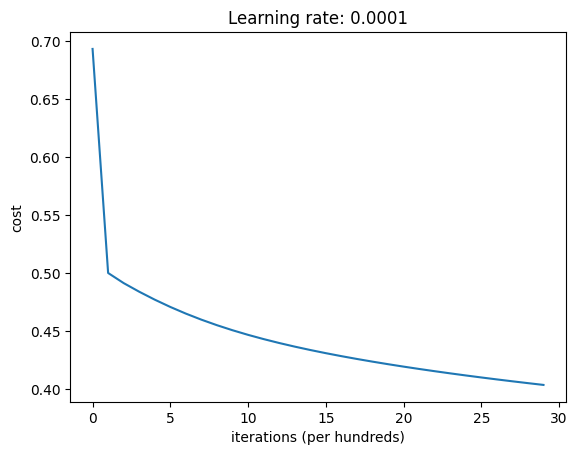

In [44]:
# Plot learning curve with costs
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate: " + str(d["learning_rate"]))
plt.show()